# Project Planning Individual
#### Predicting Usage of a Video Game Research Server

Project made by Audryleine Isidro (70928791), project-009-35


## Data Decription

My intended information source is the `Players` data set 

Number of observed rows: `196`
Number of observed columns: `7`

Columns in the dataset:
- `experience` - The experience level of each player who plays Minecraft (Beginner, Amateur, Pro, Regular and Veteran)
- `subscribe` - Whether the player subscribed to a game-related newsletter or communications. (True or False)
- `hashedEmail` - An anonymous player ID
- `played_hours` - Total number of hours the player has spent playing the game
- `name` - The player's display name
- `gender` The player's reported gender
- `age` The player's age in years

#### Data Issues:
- `age` column is missing some values
- `experience` column underrepresents the "Pro" level

## Question

**The broad question I decided to focus on was:**
- *Question 2:* We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

**The specific question I want to explore:**
- Can a player’s age and total played hours predict their experience level in Minecraft?

**How the data will address this question:**
- The players dataset contains information on each player’s age, total played hours, and experience level.
- These variables will allow me to build a classification model that predicts a player’s experience category based on how long they play and their age.
- This will help determine what types of players (for example, those who play longer or are older) have greater experience levels. This then means they would be more likely to contribute a large amount of data.

**Before analysis, I will wrangle the dataset by:**
- Ensuring all numeric values (like total played hours) are clean and consistent
- Checking for and handling any missing values.
- Combining similar experience categories to simplify the classification. -> "Amateur" and "Beginner" (Novice), "Regular" (Intermediate), "Veteran" and "Pro"(Advanced)
- I will then apply KNN classification model to predict experience level from player's age and total time played
- This analysis will provide insights into which player characteristics are linked to higher experience, thus more data contribution and therefore help the researchers recruit those type of players.

## Exploratory Data Analysis and Visualization

In [10]:
library(tidyverse)

In [13]:
url<-"https://raw.githubusercontent.com/audryleine-isidro/dsci-project-/refs/heads/main/data/players.csv"

In [14]:
# Load the data set 
players<-read_csv(url)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [15]:
# select only the experience, age and played_hours columns

players<-players|>
    select(experience,played_hours,Age)
head(players)

experience,played_hours,Age
<chr>,<dbl>,<dbl>
Pro,30.3,9
Veteran,3.8,17
Veteran,0.0,17
Amateur,0.7,21
Regular,0.1,21
Amateur,0.0,17


In [16]:
# calculate the mean for the played_hours and Age columns

players_mean<-players|>
    group_by(experience)|>
    summarize(avg_played_hours=mean(played_hours, na.rm=TRUE), 
              avg_age=mean(Age, na.rm=TRUE),)
players_mean

experience,avg_played_hours,avg_age
<chr>,<dbl>,<dbl>
Amateur,6.0174603,21.36508
Beginner,1.2485714,21.65714
Pro,2.6000000,16.92308
Regular,18.2083333,22.02857
Veteran,0.6479167,20.95833


#### Exploratory Data Visualization

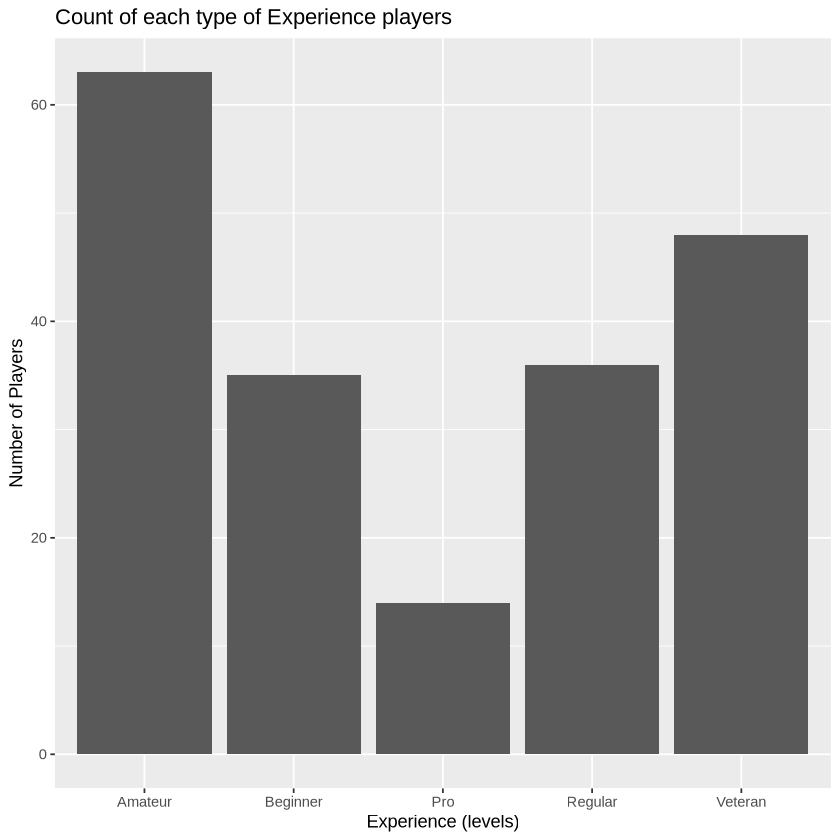

In [17]:
# Bar chart to display how many players within each experience category are found in the data set

players_bar<-players|>
    ggplot(aes(x=experience))+
    geom_bar()+
    labs(title = "Count of each type of Experience players",
       x = "Experience (levels)",
       y = "Number of Players")

players_bar

It appears from this visualization that there is not a lot of data collected on the "Pro" level players, meaning this level is underrepresented and can have an impact on the predictive anaylsis. Because of this, I will later group the categories into three broader levels—Novice (Amateur, Beginner), Intermediate (Regular), and Advanced (Pro, Veteran) to ensure a more balanced representation when exploring whether a player’s age and total played hours can predict experience level.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


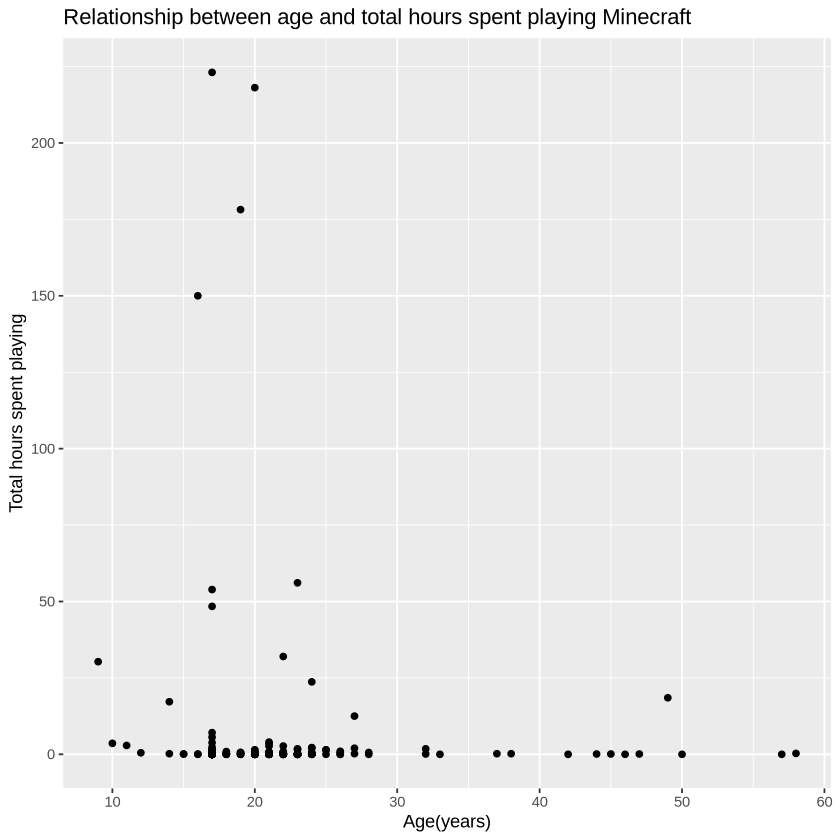

In [18]:
# scatterplot to display the relationship between age of the players and the total hours spent playing Minecraft

players_plot<-players|>
    ggplot(aes(x=Age, y=played_hours))+
    geom_point()+
    labs(title="Relationship between age and total hours spent playing Minecraft",
         x="Age(years)",
         y="Total hours spent playing")
players_plot

This scatterplot shows no clear overall relationship between age and total hours spent playing. Players around 10–20 years old tend to show longer playtimes, but most players across all ages cluster near the lower end of total hours. This indicates no consistent trend where age affects playtime. It suggests that age alone may not be a strong predictor of experience level, while total hours played might be a more meaningful variable to explain differences in player experience.

## Methods and Plans

To explore whether a player’s age and total played hours can predict their experience level in Minecraft, I will apply a K-Nearest Neighbors (KNN) classification model.

**Why this method is appropriate**

KNN is a flexible classification method that doesn’t rely on any set formula and predicts a data point’s class based on the classes of its nearest neighbors. This makes it suitable for this analysis because:
- It works with both numeric and categorical target variables without needing a linear relationship between predictors (age and played hours) and the target variable (experience level).
- It works well with smaller datasets (in the players data set- 196 observations) and is easy to understand because patterns between similar players can be clearly seen.
- Since experience level categories (Novice, Intermediate, Advanced) are distinct groups, KNN can effectively differentiate groups based on closeness in playing time and age.

**Assumptions**
- Players with similar ages and play hours are likely to have similar experience levels.
- Age and played hours need to be on a similar scale so one doesn’t overpower the other. (This will be handled during data cleaning and scaling.)
- Each experience level should have enough players for fair comparison, which is why the levels will be grouped into three balanced categories.
  
**Potential limitations**
- If one group has fewer players, KNN may favor the larger groups.
- KNN depends on distance, so unscaled data or extreme values can lower accuracy.
- It can run slowly with very large datasets, though this isn’t an issue here.

**Model comparison and selection**

Model performance will be tested using cross-validation. Different k values (such as 3, 5, and 7) will be compared to find the one with the lowest classification error.

**Before applying the model:**
1. Combine experience categories into three levels(Novice, Intermediate, Advanced) for balanced representation.
2.  Apply standardization to age and played_hours to ensure equal weighting.
   
**Data splitting:**
1. Split the dataset into training (80%) and testing (20%) subsets to evaluate model performance on unseen data.
3. The split will occur after data cleaning and scaling but before model fitting.
4. Within the training set, I will use k-fold cross-validation to fine-tune the model’s settings, such as the best number of neighbors (k).
This approach will make the KNN model fair and reliable in predicting experience level from a player’s age and total playtime, helping identify which types of players are most likely to contribute large amounts of gameplay data. In this case, the total hours played.

## GitHub Repository

The link to my repository: https://github.com/audryleine-isidro/dsci-project-.git